In [3]:
import numpy as np
import pandas as pd
import matplotlib

from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.filterwarnings(action="ignore")

In [4]:
traindf = pd.read_csv('train.csv')
testdf = pd.read_csv('test.csv')

traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print("The number of samples into the train data is {}.".format(traindf.shape[0]))

The number of samples into the train data is 891.


In [6]:
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
print('The number of samples into the test data is {}.'.format(testdf.shape[0]))

The number of samples into the test data is 418.


In [8]:
traindf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
print("Percentage of missing'Age'record is %.2f%%" % ((traindf['Age'].isnull().sum() / traindf.shape[0]) * 100))

Percentage of missing'Age'record is 19.87%


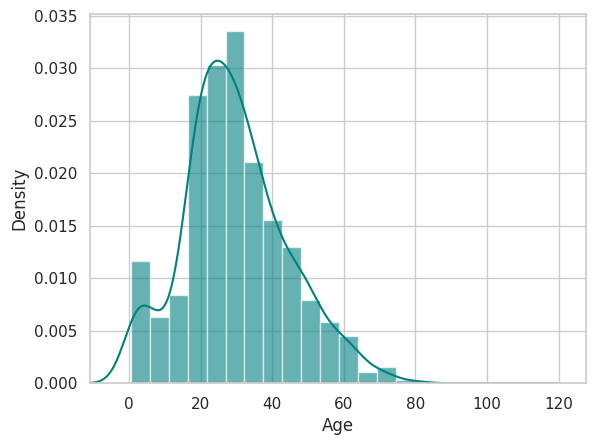

In [10]:
ax = traindf['Age'].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
traindf["Age"].plot(kind='density', color='teal')
ax.set_xlabel('Age')
plt.xlim(-10.85)
plt.show()

In [11]:
print('The mean of "Age"record is %.2f%%' % (traindf["Age"].mean(skipna=True)))
print('The median of "Age"record is %.2f' % (traindf["Age"].median(skipna=True)))

The mean of "Age"record is 29.70%
The median of "Age"record is 28.00


In [12]:
print('Percentage of missing"Cabin"record is %.2f%%' % ((traindf['Cabin'].isnull().sum() / traindf.shape[0]) * 100))

Percentage of missing"Cabin"record is 77.10%


In [13]:
print('Percentage of missing"Embarked"record is %.2f%%' % ((traindf['Embarked'].isnull().sum() / traindf.shape[0]) * 100))

Percentage of missing"Embarked"record is 0.22%


Boarded passenger grouped by port of embarkation (C = Cherbourg, 0 = Queentow, S = Southamptom):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


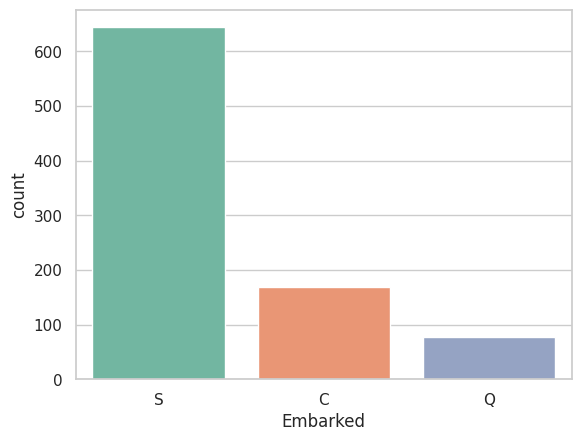

In [14]:
print('Boarded passenger grouped by port of embarkation (C = Cherbourg, 0 = Queentow, S = Southamptom):')
print(traindf['Embarked'].value_counts())
sns.countplot(x='Embarked', data=traindf, palette='Set2')
plt.show()

In [15]:
print('The most common boarding port of embarkation is %s' % traindf['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S


In [18]:
traindt = traindf.copy()
traindt["Age"].fillna(traindf["Age"].median(skipna=True), inplace=True)
traindt["Embarked"].fillna(traindf["Embarked"].value_counts().idxmax(), inplace=True)
traindt.drop('Cabin', axis=1, inplace=True)

In [19]:
traindf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

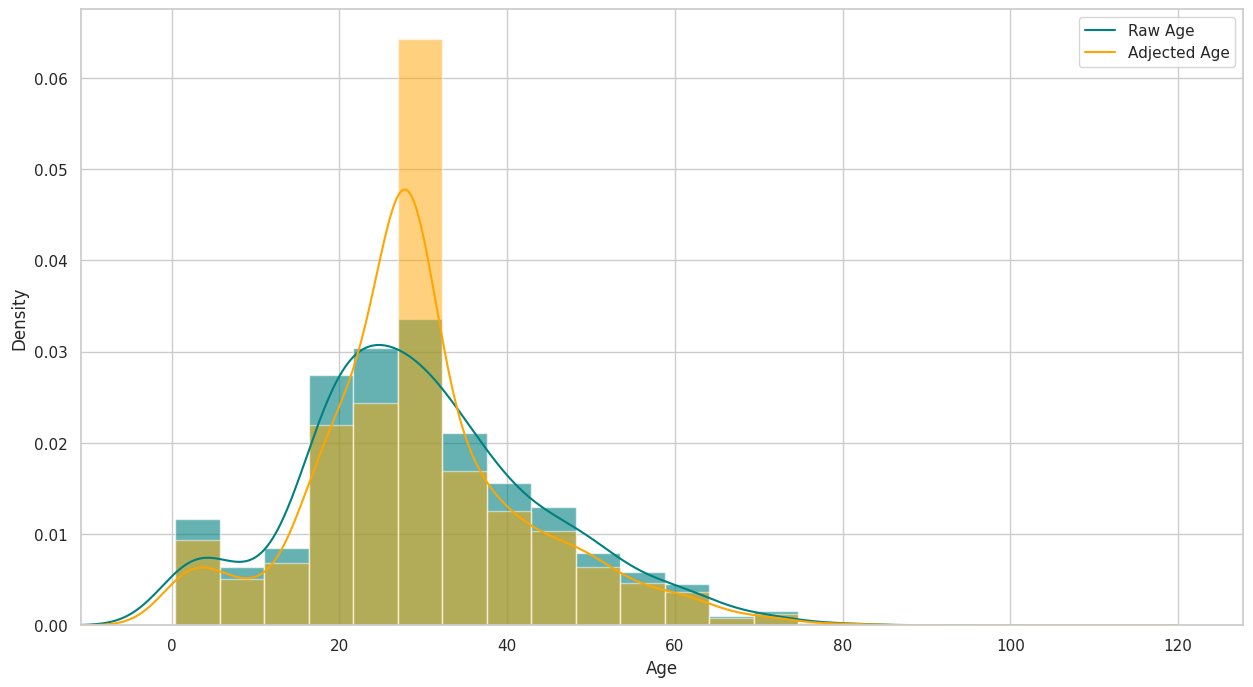

In [24]:
plt.figure(figsize=(15,8))
ax = traindf["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
traindf["Age"].plot(kind='density', color='teal')

ax = traindt["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
traindt["Age"].plot(kind='density', color='orange')

ax.legend(['Raw Age','Adjected Age'])
ax.set(xlabel='Age')
plt.xlim(-10.85)
plt.show()

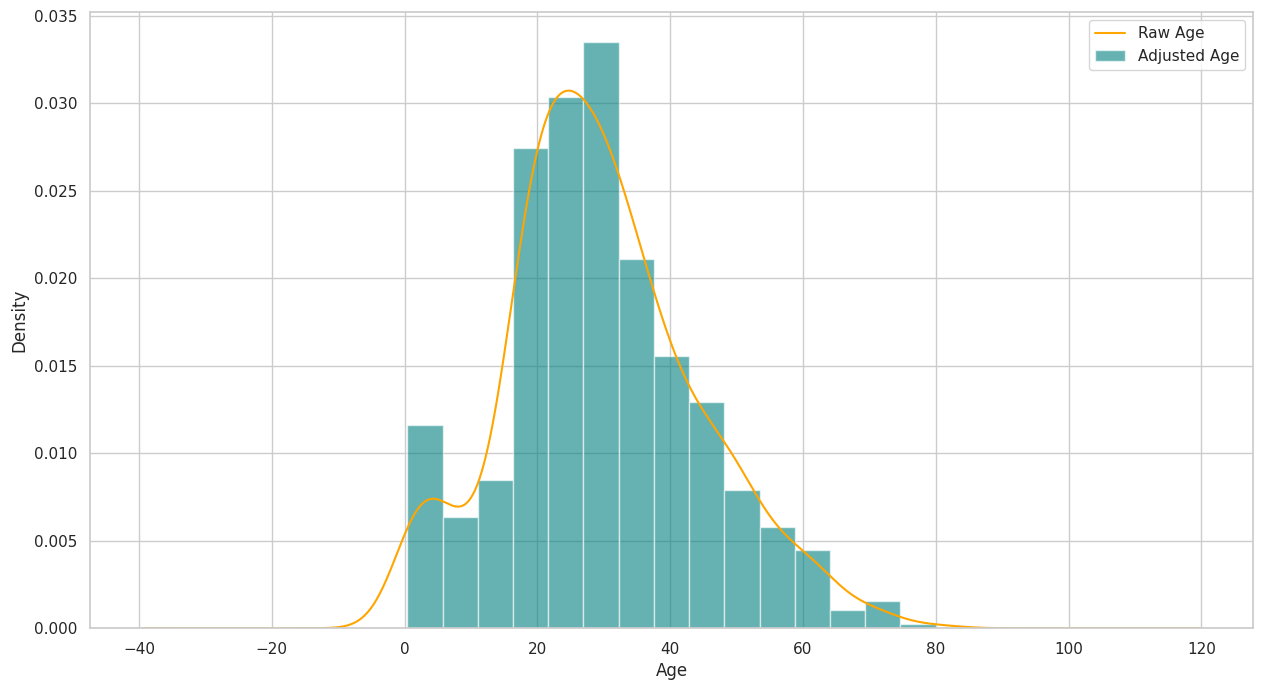

In [21]:
plt.figure(figsize=(15, 8))
ax = traindf["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
traindf['Age'].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.show()